#### de la part de Mouad Slimane

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Nettoyage de données

In [63]:
data=pd.read_csv('data4.csv')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88554 entries, 0 to 88553
Data columns (total 10 columns):
nom            88532 non-null object
date           88533 non-null object
lieu           88533 non-null object
titre          88533 non-null object
annonce        88554 non-null object
prix           88554 non-null object
type           88533 non-null object
autres.info    88533 non-null object
telephone      88554 non-null object
vues           88533 non-null float64
dtypes: float64(1), object(9)
memory usage: 6.8+ MB


In [65]:
# eliminer les annonces repetees
du=data.drop_duplicates()

In [66]:
du.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88541 entries, 0 to 88553
Data columns (total 10 columns):
nom            88527 non-null object
date           88528 non-null object
lieu           88528 non-null object
titre          88528 non-null object
annonce        88541 non-null object
prix           88541 non-null object
type           88528 non-null object
autres.info    88528 non-null object
telephone      88541 non-null object
vues           88528 non-null float64
dtypes: float64(1), object(9)
memory usage: 7.4+ MB


In [67]:
#eliminer les annoces dont le type est inconnue
df=du[du['type'].notnull()]

In [68]:
df['type']=df['type'].apply(lambda var:var.split(',')[0])

C:\Users\aiyda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## analyse generale

### objectif: trouver la meilleur maniere de deposer une annonce sur avito pour garantir un grand nombre de vue de l'annonce

##### 1-type et nombre de vue

In [69]:
# classement de type selon le nombre des annoces
df['type'].value_counts()

 Matériels Professionnels                9483
 Voitures                                9308
 Ordinateurs de bureau                   8924
 Téléphones                              6836
 Appartements                            5457
 Accessoires informatique et Gadgets     5098
 Pièces et Accessoires pour véhicules    4612
 Ordinateurs portables                   4422
 Meubles et Décoration                   4097
 Electroménager et Vaisselles            3058
 Animaux                                 2597
 Motos                                   2470
 Jeux vidéo et Consoles                  2411
 Locations de vacances                   1916
 Terrains et Fermes                      1619
 Appareils photo et Caméras              1574
 Image & Son                             1374
 Maisons et Villas                       1269
 Vélos                                   1140
 Montres et Bijoux                        834
 Produits de beauté                       727
 Magasins                         

In [70]:
#classement de type selon le nombre de vue
df.groupby('type')['vues'].sum().sort_values(ascending=False).sort_values(ascending=False).head()


type
 Voitures        9555414.0
 Appartements    3521378.0
 Téléphones      1306301.0
 Motos           1179777.0
 Animaux          648696.0
Name: vues, dtype: float64

In [71]:
#rapport de nombre de vue sur le nombre d'annonce pour les types qui depasse 1000 annonce
((df.groupby('type')['vues'].sum().sort_values(ascending=False).head(19))/(df['type'].value_counts())).sort_values(ascending=False).head(19)


 Voitures                                1026.580791
 Camions                                  760.152012
 Appartements                             645.295584
 Motos                                    477.642510
 Maisons et Villas                        462.438928
 Terrains et Fermes                       325.762199
 Magasins                                 258.618915
 Animaux                                  249.786677
 Jeux vidéo et Consoles                   208.786810
 Téléphones                               191.091428
 Vélos                                    182.421930
 Ordinateurs portables                    111.721619
 Meubles et Décoration                    109.299243
 Image & Son                              103.021834
 Pièces et Accessoires pour véhicules      91.337814
 Electroménager et Vaisselles              74.271746
 Accessoires informatique et Gadgets       60.825422
 Ordinateurs de bureau                     50.887831
 Matériels Professionnels                  35.

In [72]:
a=((df.groupby('type')['vues'].sum().sort_values(ascending=False).head(19))/(df['type'].value_counts())).sort_values(ascending=False).head(12)

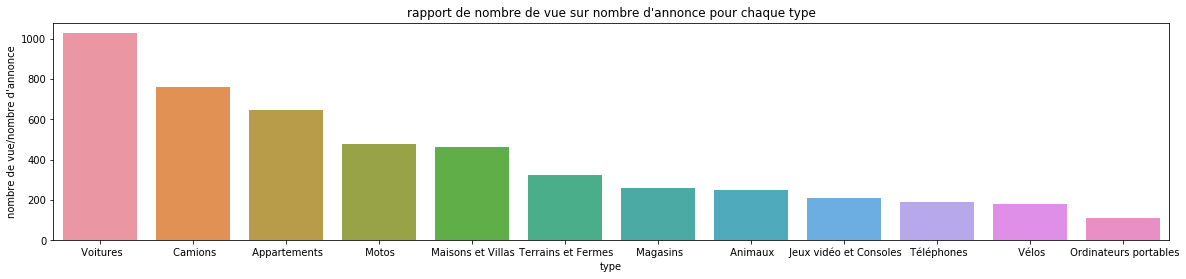

In [73]:
plt.figure(figsize=(20,4))
plt.xlabel("type")
plt.ylabel("nombre de vue/nombre d'annonce")
plt.title("rapport de nombre de vue sur nombre d'annonce pour chaque type")
sns.barplot(x=a.index,y=a)

#### conclusion: les visiteurs de ce site sont plus interesses par les moyens de transport(voitures,camions,motos),et les maisons et ils sont moins interesses par les materiels professionnel


#### 2-prix et nombre de vue

In [74]:
# on travail dans cette partie sur les types voitures camions motos pour determiner les autres facteurs
mt=df[(df['type']==' Voitures')|(df['type']==' Camions')|(df['type']==' Motos')]

In [75]:
# on etudie l'impact de l' absence de prix sur le nombre de vue
sum(mt[mt['prix']=='test']['vues'])/mt[mt['prix']=='test']['vues'].count()#absence de prix


655.8472871002515

In [76]:
sum(mt[mt['prix']!='test']['vues'])/mt[mt['prix']!='test']['vues'].count()#presence de prix
# les visiteurs sont plus interesses par les annonces ou on mentionne le prix

974.5530726256983

In [77]:
#elimination des données manquantes dans la colonne prix et conversion de cette collone en type int
mt1=mt[mt['prix']!='test']
mt1['prix']=mt1['prix'].apply(lambda var:int(var.replace(' ','')))

C:\Users\aiyda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
mt1.head()

,nom,date,lieu,titre,annonce,prix,type,autres.info,telephone,vues
5,abdessadek,Aujourd'hui 00:26,Casablanca,jetta Volkswagen -2006,1.9tdi automatique tt option model 2006 deouan...,85000,Voitures,Année-Modèle 2006 Kilométrage 170 000 - ...,0660805589,6.0
17,Hamou,Aujourd'hui 00:23,Khénifra,Fiat climatisée -2008,Salam kayna had tomobil lbi3 3amra fiha clima ...,68500,Voitures,Année-Modèle 2008 Kilométrage 130 000 - ...,0600720360,35.0
36,auto,Aujourd'hui 00:17,Fès,alto essence -2008,ma voiture Suzuki alto lbi3 très très très Bon...,45000,Voitures,Année-Modèle 2008 Kilométrage 5 000 - 9 ...,0601189134,47.0
43,tarik,Aujourd'hui 00:15,Fès,golf 3 bon etat -1996,golf3 mliha 1996 diwna 2005 Boite à vitesse : ...,47000,Voitures,Année-Modèle 1996 Kilométrage 0 - 4 999 ...,0660419859,56.0
73,auto,Aujourd'hui 00:08,Fès,hyundai i10 -2008,ma voiture Hyundai10 très Bon Etat Jamais acci...,55000,Voitures,Année-Modèle 2008 Kilométrage 10 000 - 1...,0601189134,88.0


In [79]:
mt1['prix'].sort_values().head(15)

1879       1
84528     10
60941     18
87550     19
61283     20
79633     22
61223     23
66652     23
66618     23
87571     36
245      500
609      700
67462    720
67444    720
718      800
Name: prix, dtype: int64

In [80]:
#le nombre des annonces dont le prix est superieur a 500 000
(mt1[mt1['prix']>=500_000]['vues']).count()

52

In [81]:
#prix et nombre de vue
#on s' intersse au prix superieur a 5 000 et prix < 500 000 (puisque y a que 51 annonce dont le prix et superieur a 500 000)
mt1=mt1[(mt1['prix']>=5000)&(mt1['prix']<=500_000)]

In [82]:
ind=[str(i*5)+'0k-'+str((i+1)*5)+'0k' for i in range(0,10)]

In [83]:
L=[]
for i in range (0,10):
    t=sum(mt1[(mt1['prix']>=i*50_000)&(mt1['prix']<=(i+1)*50_000)]['vues'])/((mt1[(mt1['prix']>=i*50_000)&(mt1['prix']<=(i+1)*50_000)]['vues']).count())
    L.append(t)
T=pd.Series(data=L,index=ind)

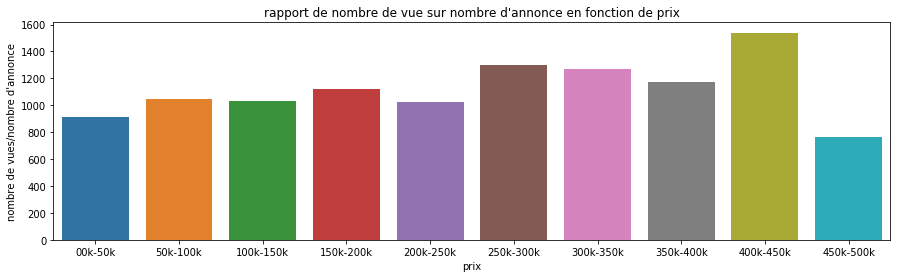

In [84]:
plt.figure(figsize=(15,4))
plt.xlabel('prix')
plt.ylabel("nombre de vues/nombre d'annonce")
plt.title("rapport de nombre de vue sur nombre d'annonce en fonction de prix")
sns.barplot(x=T.index,y=T)

In [85]:
# remarque : on ne voit pas une grande influence de prix de l'objet sur le rapport n.vue/n.annonce a part quand
# on depasse les 450k ou se rapport diminue on peut conclure que la plupart des
#visiteurs de ce site son de la classe sociale moyenne ou aisee

#### conclusion: la presence de prix et necessaire pour garantir un bon nombre de vue par contre la valeur de prix n'as pas d'influence a condition que le prix ne depasse pas les 450k

#### 3-date

In [86]:
# on s'interesse dans cette partie sur l'impact de l'heure de l'annonce sure le nombres de vues
# on utilise datta frame df
df['date']=df['date'].apply(lambda var:var.split(':')[0][-2:])#on laisse que l'heure dans la case de date
df['date']=df['date'].apply(lambda var:int(var))


C:\Users\aiyda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aiyda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [87]:
df['date'].value_counts()
#le site est plus actif entre 11h et 13h

11    7206
12    7075
15    6732
14    6726
10    6454
16    6260
13    6226
17    5609
18    5318
19    4864
9     4518
20    4404
21    4103
22    2981
23    2380
8     2287
0     1754
1     1035
2      713
7      529
3      422
6      385
4      293
5      254
Name: date, dtype: int64

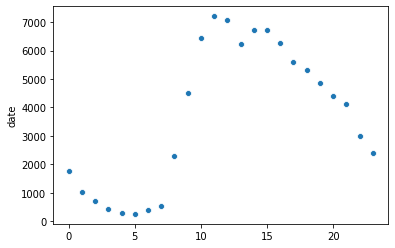

In [88]:
T=df['date'].value_counts()
sns.scatterplot(T.index,T)#la mojorité des annonces sont deposees dans le site entre 8h et 16h

In [89]:
#on calcule le rapport usuel
B=df.groupby('date')['vues'].sum()/(df.groupby('date')['vues'].count())

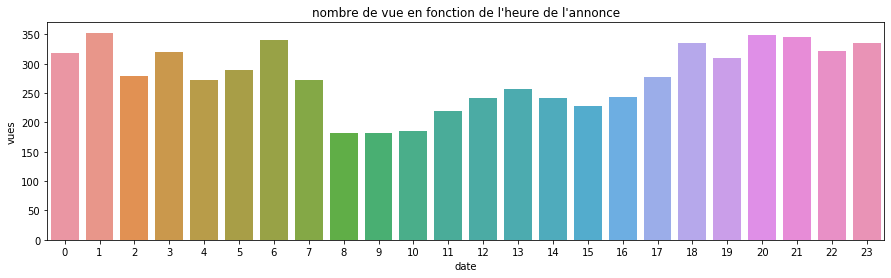

In [90]:
plt.figure(figsize=(15,4))
plt.xlabel('heure')
plt.ylabel('repport')
plt.title("nombre de vue en fonction de l'heure de l'annonce")
sns.barplot(x=B.index,y=B)

In [91]:
#remarque: comme on a vu dans ce qui precede la majorité des annonces sont deposées sur le site entre 8h et 16h donc
#a cette periode il y a 
#moins de chance que votre soit remarquer par les utilisateurs et elle ne reste pas beaucoup de temps dans la premiere page
#a cause de nombre considerable des nouvelles annonces

#### conclusion : pour garantir un bon nombre de vue pour une annonce faut eviter sa desposition entre 10h et 16h et de la deposer apres 18h car apres cette heure il y a pas beaucoup de nouvelles annonces et meme je crois que le nombre de visiteurs de site a cette periode va etre considerable (pas de donnees pour determiner ce nombre)

## récapitulatif:
### les visiteurs de avito sont plus interesses par les voitures et la majorité sont d'une classe socile moyenne
### la presence de prix dans l' annonce et la desposition de l'annonce apres 18h est la meilleur façon pour augmenter la chance de vendre un objet (un grand nombre de vue)


# objectif2:
### etablir un facteur qui determine les prix de maison

#### preparation des donnees

In [92]:
stat=data[data['type']==' Maisons et Villas, Offre    ']

In [93]:
stat=stat[stat['prix']!='test']

In [94]:
stat['prix']=stat['prix'].apply(lambda var:int(var.replace(' ','')))#convertir le type de la colonne en int

In [95]:
stat=stat[stat['prix']>=200000]


In [96]:
stat=stat[stat['autres.info'].apply(lambda var:len(var.split('   Nombre de pièces   '))==2)]


In [97]:
stat['nombre de piece']=stat['autres.info'].apply(lambda var:var.split('   Nombre de pièces   ')[1][0:2])
#creation d' une nouvelle colonne nombre de piece

In [98]:
stat['surface']=stat['autres.info'].apply(lambda var:var.split('Surface totale ')[1].split('m²')[0])
#creation d'une nouvelle colonne surface


In [99]:
stat=stat[stat['surface'].apply(lambda var:len(var)<=4)]# eliminer les maisons dont la surface est inconnue

In [100]:
stat['surface']=stat['surface'].apply(lambda var:int(var))#changer le type de la collone surface

In [101]:
stat=stat[stat['nombre de piece'].apply(lambda var:var!='- ')]#eliminer les maisons dont le nombre de piece  est inconnu

In [102]:
stat['nombre de piece']=stat['nombre de piece'].apply(lambda var:int(var))#changer le type de la collone nombre de piece

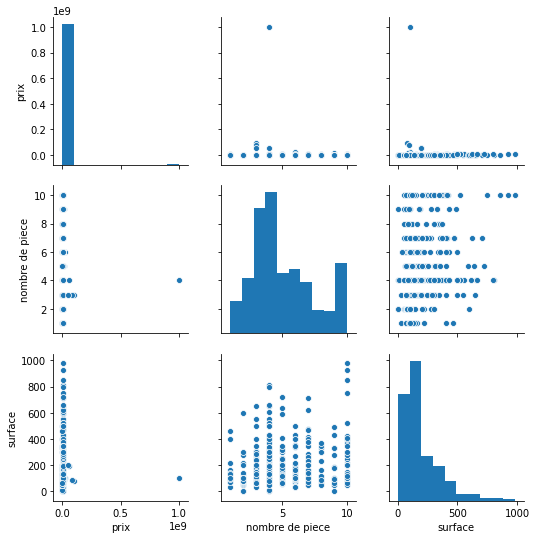

In [103]:
# presentation des donnees 
sns.pairplot(stat.drop('vues',axis=1))
#on remarque qu'il y une incoherence dans les donnees il y a des points isolés 
#on elimine ces points


In [104]:
stat['prix'].sort_values(ascending=False)# on prend que les donnees dont le prix est inferieur a  14 000 000

68349    1000000000
42092      98000000
81427      78000000
43042      55000000
88360      52000000
1287       25000000
34885      14000000
68754      12000000
19977       8500000
87638       8500000
75489       8500000
81767       8400000
62375       8000000
11475       7900000
75637       7800000
46167       7500000
33279       7200000
5989        7200000
85993       7000000
64532       6800000
1845        6500000
14765       6400000
72784       6200000
5022        6000000
28617       5900000
63156       5500000
8694        5500000
87201       5400000
2345        5300000
26737       5000000
            ...    
63617        360000
66355        350000
9695         350000
16970        350000
85889        350000
17027        350000
67207        340000
51800        340000
39073        320000
85584        300000
88090        300000
56735        280000
73980        280000
50794        280000
30324        270000
78352        270000
23450        270000
55021        260000
39089        260000


In [105]:
stat=stat[stat['prix']<=14000000]

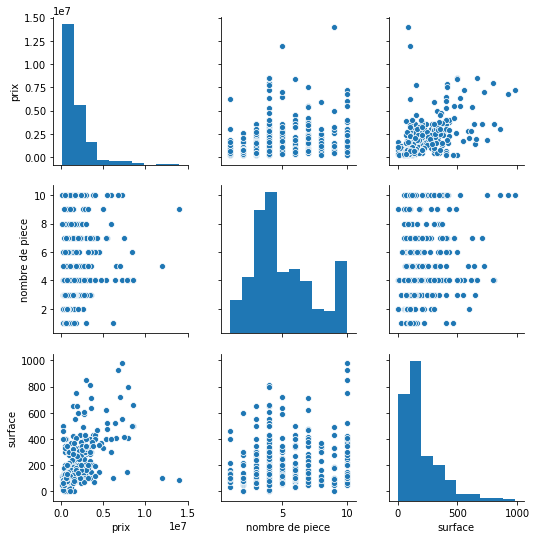

In [106]:
#verifcation
sns.pairplot(stat.drop('vues',axis=1))
#mieux qu'avant

In [107]:
#amelioration
stat=stat[stat['prix']<=max(stat[stat['nombre de piece']==10]['prix'])]

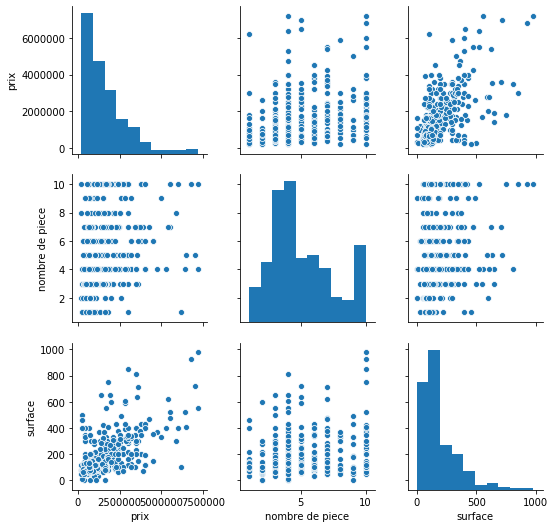

In [108]:
#verification 2
sns.pairplot(stat.drop('vues',axis=1))
#remarque plus de point isolé

In [109]:
X=stat[['surface','nombre de piece']]

In [110]:
y=stat['prix']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#on divise data en deux parties
#une pour trainer le model et l'autre pour le tester

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lm=LinearRegression()

In [115]:
lm.fit(X_train,y_train)#trainer le model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
predict=lm.predict(X_test)

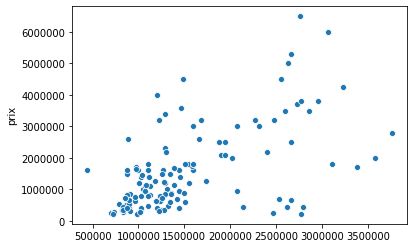

In [117]:
sns.scatterplot(x=predict,y=y_test)

## evaluation du model
### on remrque que notre model fonction assez bien pour les maison dont le prix < 17 000 000 et plus le prix original augmente plus notre model donne des predictions erronees cela car j'ai negligé un facteur determinant c'est le lieu de la maison (besoin d'autre données)

In [118]:
# prediction des informations manquantes
#j' ai repeté les memes etapes pour cree les colonnes nombre de piece et surface
pre=data[data['type']==' Maisons et Villas, Offre    ']
pre=data[data['prix']=='test']


In [119]:
pre=pre[pre['autres.info'].apply(lambda var:len(str(var).split('   Nombre de pièces   '))==2)]
pre['nombre de piece']=pre['autres.info'].apply(lambda var:var.split('   Nombre de pièces   ')[1][0:2])
pre['surface']=pre['autres.info'].apply(lambda var:var.split('Surface totale ')[1].split('m²')[0])
pre=pre[pre['surface'].apply(lambda var:len(var)<=4)]# eliminer les maisons dont la surface est inconnue
pre['surface']=pre['surface'].apply(lambda var:int(var))#changer le type de la collone surface
pre=pre[pre['nombre de piece'].apply(lambda var:var!=' -')]
pre=pre[pre['nombre de piece'].apply(lambda var:var!='- ')]#eliminer les maisons dont le nombre de piece  est inconnu
pre['nombre de piece']=pre['nombre de piece'].apply(lambda var:int(var))#changer le type de la collone nombre de piece

In [120]:
X1=pre[['surface','nombre de piece']]
pre['prix']=lm.predict(X1)

# fin